# **Klasifikasi Time Series Gun Point**

## **Pendahuluan**

Klasifikasi Deret Waktu (*Time Series Classification*), merupakan pembelajaran terawasi (*supervised learning*) yang bertujuan untuk memetakan urutan data temporal (input) ke dalam label kategori diskrit (output). Berbeda dengan klasifikasi data statis, klasifikasi ini mempertimbangkan ketergantungan urutan (*sequential dependency*) dan pola perubahan nilai sepanjang waktu sebagai fitur utama dalam pengambilan keputusan.

Salah satu studi kasus bidang ini adalah masalah Gun vs Point. Skenario pengawasan keamanan yang bertujuan mendeteksi ancaman dari gerakan tangan, dengan membedakan 2 aktivitas yang secara visual sangat mirip:
1. Gerakan seseorang yang sedang menarik senjata dari pinggang (**Gun-Draw**)
2. Gerakan seseorang yang hanya mengangkat tangan untuk menunjuk sasaran (**Point**). 

Meskipun terlihat sederhana, perbedaan pola gerakan di antara keduanya sangat tipis, sehingga memerlukan analisis data yang presisi.

Untuk menyelesaikan permasalahan tersebut, analisis ini mengguanakan metode **CRISP-DM** (Cross-Industry Standard Process for Data Mining). Metode ini dipilih sebagai panduan karena memiliki siklus kerja yang jelas.

## **Metodologi CRISP-DM**

### Apa itu CRISP-DM?

**CRISP-DM** merupakan singkatan dari **Cross-Industry Standard Process for Data Mining**. Metodologi CRISP-DM menyediakan pendekatan terstruktur untuk merencanakan proyek data sain. Ini adalah metodologi yang tangguh dan telah terbukti.

Model ini merupakan rangkaian kejadian yang diidealkan. Dalam praktiknya, banyak tugas dapat dilakukan dalam urutan yang berbeda dan sering kali perlu untuk kembali ke tugas sebelumnya dan mengulangi tindakan tertentu. Model ini tidak mencoba untuk menangkap semua kemungkinan rute melalui proses analisis data.

### 6 tahapan proses analisis data:

1. Business understanding
2. Data understanding
3. Data preparation
4. Modeling
5. Evaluation
6. Deployment

![CRISP-DM Diagram](https://www.djkn.kemenkeu.go.id/files/images/2022/06/skema.jpg)

## **1. Business Understanding (Pemahaman Bisnis)**

### **1.1 Latar Belakang**
Dalam sistem keamanan modern dan pengawasan video (video surveillance), kamera CCTV menghasilkan data visual dalam jumlah masif yang tidak mungkin dipantau secara manual oleh manusia selama 24 jam non-stop. Kelelahan operator (human fatigue) sering menjadi penyebab terlewatnya deteksi ancaman nyata.

Salah satu ancaman paling berbahaya adalah penggunaan senjata api. Namun, tantangan terbesar dalam automasi deteksi ini adalah **kemiripan visual** antara gerakan agresif (menarik senjata) dengan gerakan non-agresif (sekadar menunjuk). Secara kasat mata, kedua gerakan ini melibatkan ekstensi lengan ke arah target, namun memiliki **dinamika gerakan** (kecepatan, lintasan, dan hentakan) yang berbeda.

![GUN vs POINT](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTiNZFJbSgLt_aFlekMYv1F0UkhsNJ4WvBIQ&s)

### **1.2 Permasalahan**

Dalam konteks keamanan, tidak semua kesalahan prediksi memiliki nilai yang sama. Analisis ini sangat krusial untuk menentukan keberhasilan model:
- False Positive (Tipe I Error):
    - Skenario: Seseorang hanya menunjuk (Point), tapi model memprediksinya sebagai senjata (Gun).
    - Dampak: Alarm palsu berbunyi. Aparat keamanan mungkin bertindak agresif terhadap warga sipil yang tidak bersalah.
    - Risiko: Kepanikan, gangguan operasional, dan potensi tuntutan hukum karena tindakan berlebihan.
- False Negative (Tipe II Error):
    - Skenario: Seseorang menarik senjata (Gun), tapi model memprediksinya sebagai menunjuk biasa (Point).
    - Dampak: Sistem gagal membunyikan alarm. Penjahat berhasil menggunakan senjata. 
    - Risiko: Hilangnya nyawa atau kerugian aset. Kesalahan ini harus ditekan seminimal mungkin (High Recall Priority).


### **1.3 Tujuan**

Tujuan utama dari proyek ini, Mengembangkan sistem cerdas yang mampu membedakan dua aktivitas spesifik dari dataset GunPoint dengan presisi tinggi:
1. **Gun-Draw (Ancaman)**: Gerakan seseorang mengambil senjata dari sarung di pinggang dan mengarahkannya ke target.
2. **Point (Non-Ancaman)**: Gerakan seseorang mengangkat tangan kosong untuk menunjuk ke arah target.

Sistem ini bertujuan untuk membantu operator keamanan dengan memberikan peringatan dini (early warning) hanya ketika ancaman senjata terdeteksi, meminimalisir intervensi manusia pada aktivitas yang tidak berbahaya.

Berdasarkan tujuan, target teknis dari proyek ini:
1. Membangun model klasifikasi Time Series yang mampu mempelajari pola temporal (urutan waktu) dari pergerakan tangan.
2. Memastikan model dapat membedakan fitur unik seperti "jeda saat mengambil senjata" vs "gerakan mulus saat menunjuk".
3. Mencapai metrik evaluasi yang seimbang, dengan penekanan khusus agar tidak melewatkan kelas Gun-Draw.


## **2. Data Understanding (Pemahaman Data)**


### **2.1 Sumber Data**

Data yang digunakan adalah dataset GunPoint yang diperoleh secara publik dari repositori **Time Series Classification**.

- URL Sumber: https://www.timeseriesclassification.com/description.php?Dataset=GunPoint

- Deskripsi: Dataset ini berisi rekaman gerakan aktor dalam dua skenario:

    - Gun-Draw (Kelas 1): Menarik senjata dari sarung, mengarahkannya, lalu mengembalikannya.

    - Point (Kelas 2): Menunjuk dengan jari tanpa senjata.

- Jenis Data: Univariat Time Series.

- Data diambil dari eksperimen Video Surveillance oleh Ratanamahatana dan Keogh (2004).

- Metode: Menggunakan Motion Tracking untuk melacak Centroid (Titik Tengah) tangan kanan aktor dari setiap frame video.

- Setup Pengambilan:
    - Aktor berdiri menyamping terhadap kamera.

1. GUN-Draw

![
](https://www.timeseriesclassification.com/images/datasets/GunPoint.png)

Aktor memiliki replika senjata di sarung pistol (holster) yang terikat di pinggang. Aktor menggerakkan tangan dari posisi santai, turun mengambil senjata, mengangkatnya ke arah target (setinggi mata), lalu mengembalikannya ke sarung.

2. Point

![](https://ai-fast-track.github.io/timeseries/images/gunpoint.png)

Aktor tidak membawa senjata. Aktor menggerakkan tangan dari posisi santai, mengangkat jari telunjuk ke arah target, lalu menurunkannya kembali.


### **2.2 Integrasi Data**

#### Instalasi Dependency yang diperlukan

In [ ]:
pip install scikit-learn aeon matplotlib seaborn pandas numpy

- skicit-learn: Framework umum untuk Machine Learning

- aeon: Framework khusus untuk Time Series Machine Learning.

- numpy: untuk komputasi numerik.

- matplotlib & seaborn: Untuk visualisasi.

- pandas: Untuk manipulasi data.

#### Import Data

In [2]:
import numpy as np
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split

# 1. Load data 
X_train, y_train, _ = load_classification("GunPoint", split="train", return_metadata=True)
X_test, y_test, _ = load_classification("GunPoint", split="test", return_metadata=True)

# 2. Gabungkan menjadi satu dataset utuh
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print(f"Total Data: {X.shape}") 

Total Data: (200, 1, 150)


Dimensi data (200, 1, 150).
- 200: Total sampel.
- 1: Univariate (hanya satu variabel yang diamati).
- 150 (Time Steps): Panjang durasi gerakan).

### **2.3 Eksplorasi Data**

#### Display Data

In [3]:
import pandas as pd

X = X.squeeze()
df = pd.DataFrame(X)
df['Kelas'] = y


print(df.to_string())

            0         1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46        47        48        49        50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66        67        68        69        70        71        72        73        74        75        76        77        78        79        80        81        82        83        84        85        86        87        88        89        90        91        92        93        94        95        96        97        98       

1. **Sumbu Koordinat**: Angka-angka dalam dataset merepresentasikan pergerakan pada Sumbu-X (Horizontal) dari tangan aktor.
    - Kenapa Sumbu-X? Karena saat aktor mengangkat tangan dari pinggang ke depan mata, terjadi perpindahan posisi horizontal yang signifikan yang membentuk pola gelombang unik.

2. **Jumlah Fitur 150**:
Setiap aktor diberi sinyal secara berkala setiap 5 detik
sebelum setiap pengulangan aksi Gun-Draw/Point, klip video
(yang direkam dengan kecepatan 30 frame per detik) dapat dengan mudah dibagi
menjadi 150 titik data(30x5).

#### Pola Gun Vs Point

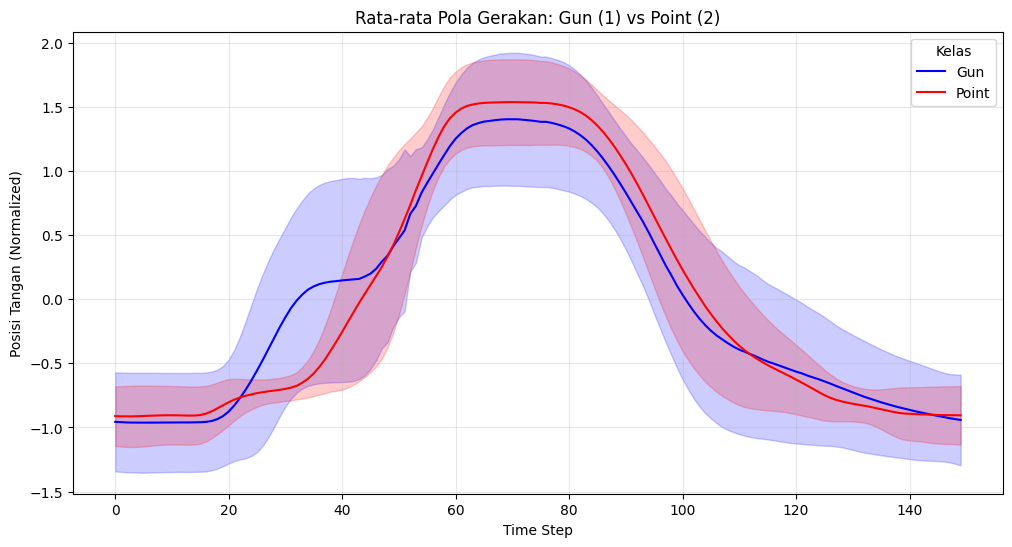

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_vis = pd.DataFrame(X.squeeze())
df_vis['Label'] = y.astype(str)

df_melt = df_vis.melt(id_vars='Label', var_name='Time_Step', value_name='Value')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_melt, x='Time_Step', y='Value', hue='Label',
    palette={'1': 'red', '2': 'blue'}, errorbar='sd'
)

plt.title("Rata-rata Pola Gerakan: Gun (1) vs Point (2)")
plt.xlabel("Time Step")
plt.ylabel("Posisi Tangan (Normalized)")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], title='Kelas', labels=['Gun', 'Point'])

plt.grid(True, alpha=0.3)
plt.show()


1. Kelas Gun (Biru): adanya **Overshoot** atau lekukan di awal. Lekukan ini terjadi karena sebelum tangan bisa Maju membidik, tangan harus Mundur sedikit atau tertahan di posisi pinggang untuk menarik senjata dari sarung (holster).
2. Kelas Point (Merah): Grafik cenderung naik dan turun dengan mulus (smooth). Merepresentasikan gerakan tangan yang langsung menunjuk sasaran tanpa hambatan.


#### Distribusi Kelas

C:\Users\sahl\AppData\Local\Temp\ipykernel_2816\35083335.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_label, x='Kelas', y='Jumlah', palette='viridis')


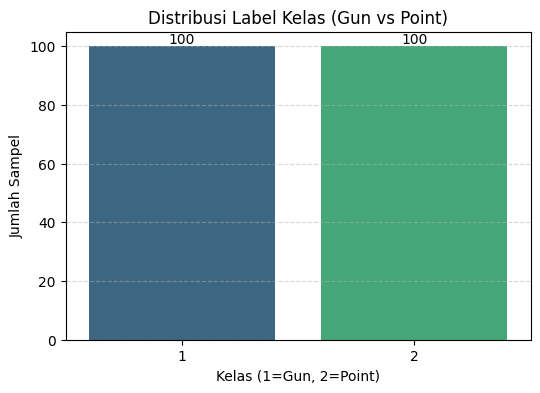

In [5]:


unique, counts = np.unique(y, return_counts=True)
df_label = pd.DataFrame({'Kelas': unique, 'Jumlah': counts})

plt.figure(figsize=(6, 4))
sns.barplot(data=df_label, x='Kelas', y='Jumlah', palette='viridis')
plt.title('Distribusi Label Kelas (Gun vs Point)')
plt.ylabel('Jumlah Sampel')
plt.xlabel('Kelas (1=Gun, 2=Point)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for index, row in df_label.iterrows():
    plt.text(index, row.Jumlah, row.Jumlah, color='black', ha="center", va="bottom")
plt.show()

Distribusi kelas sempurna (100 Gun : 100 Point). Tidak memerlukan teknik Oversampling (SMOTE) atau Undersampling.

#### Distribusi Fitur

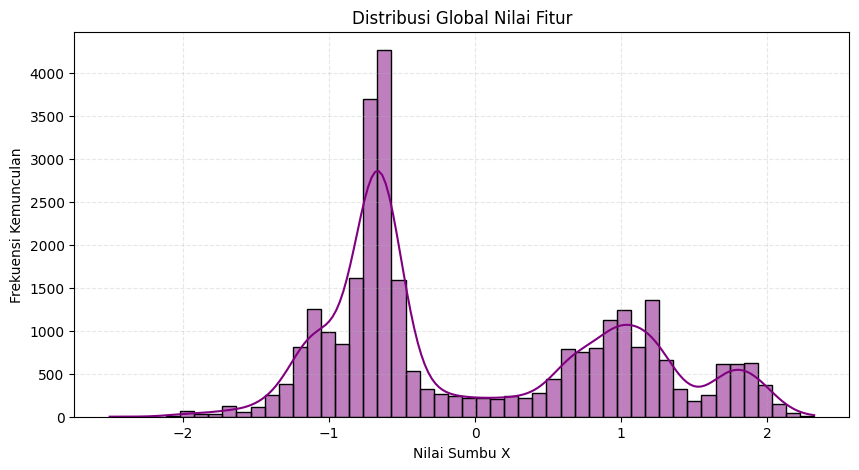

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(X.flatten(), bins=50, kde=True, color='purple')
plt.title('Distribusi Global Nilai Fitur')
plt.xlabel('Nilai Sumbu X')
plt.ylabel('Frekuensi Kemunculan')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Data ini sudah melalui proses Z-Normalization oleh penyedia dataset,berkisar antara -2 sampai 2. Maka tidak ada Outlier pada dataset ini.


#### Visualisasi Ruang Fitur

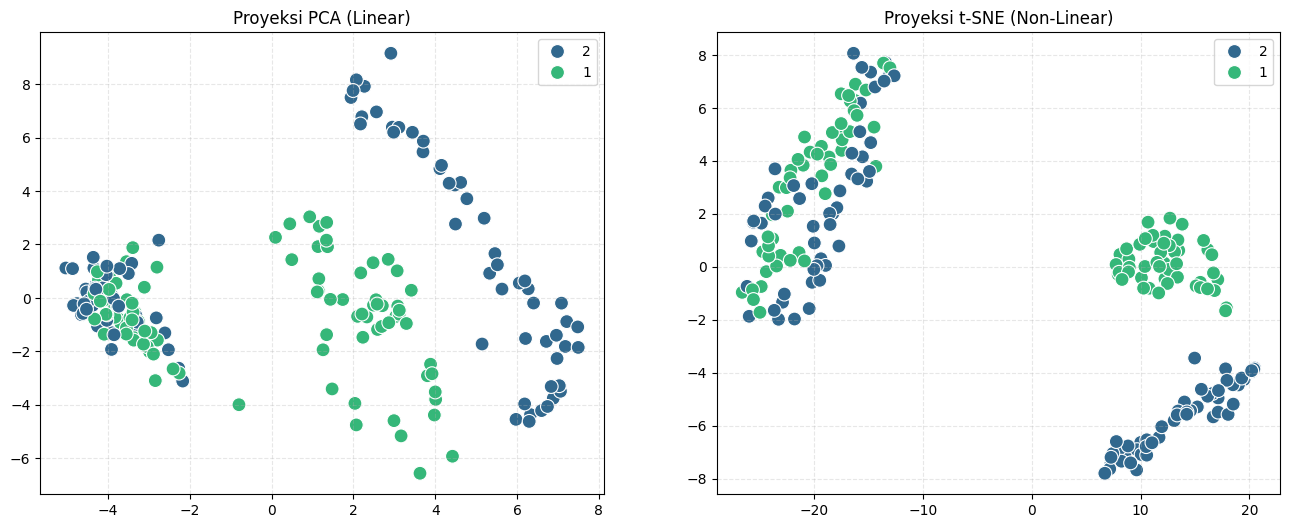

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot PCA
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', ax=axs[0], s=100)
axs[0].set_title('Proyeksi PCA (Linear)')
axs[0].grid(True, linestyle='--', alpha=0.3)

# Plot t-SNE
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='viridis', ax=axs[1], s=100)
axs[1].set_title('Proyeksi t-SNE (Non-Linear)')
axs[1].grid(True, linestyle='--', alpha=0.3)

plt.show()

1. PCA (Kiri): Terlihat kedua kelas (Gun vs Point) sudah mulai terpisah, namun masih ada area yang tumpang tindih (overlap). Ini menunjukkan bahwa secara linear, data ini cukup sulit dipisahkan dengan sempurna.
2. t-SNE (Kanan): Algoritma non-linear ini berhasil memisahkan cluster Gun dan Point dengan sangat tegas (ada celah jelas di antara keduanya).


#### Cek Konsistensi Gerakan

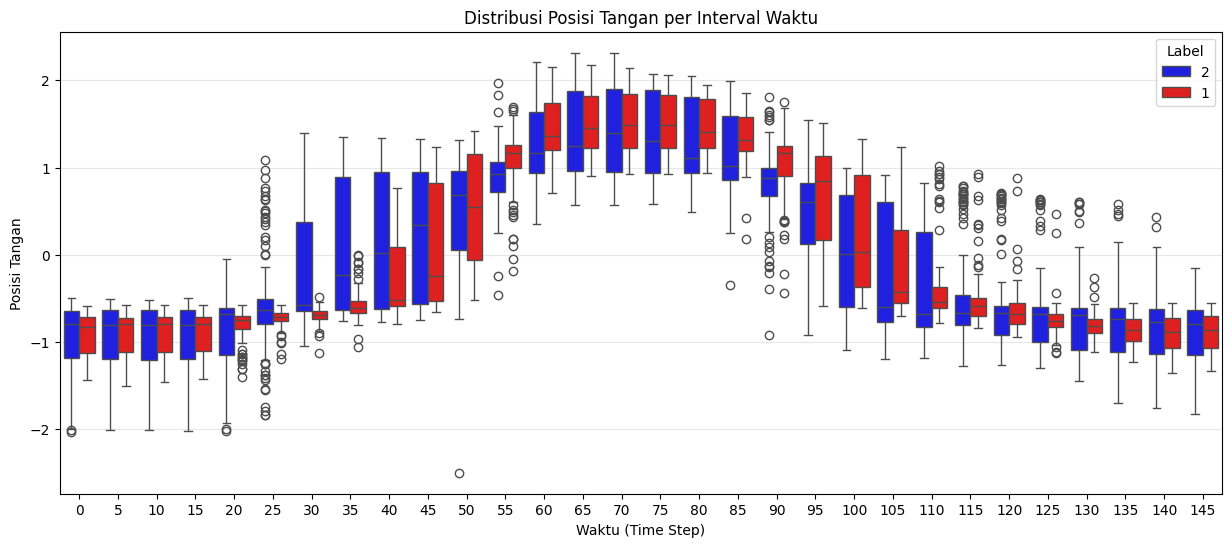

In [8]:
plt.figure(figsize=(15, 6))


df_plot = pd.DataFrame(X)
df_plot['Label'] = y

df_melted = df_plot.melt(id_vars='Label', var_name='Time_Step', value_name='Posisi')
df_melted['Time_Step'] = df_melted['Time_Step'].astype(int)

df_melted_filtered = df_melted[df_melted['Time_Step'] % 5 == 0]

sns.boxplot(x='Time_Step', y='Posisi', hue='Label', data=df_melted_filtered, palette={'1': 'red', '2': 'blue'})
plt.title("Distribusi Posisi Tangan per Interval Waktu")
plt.xlabel("Waktu (Time Step)")
plt.ylabel("Posisi Tangan")
plt.grid(True, axis='y', alpha=0.3)
plt.show()

Pada time Step 20-60, Terlihat kotak (box) yang lebih lebar dan perbedaan posisi median yang signifikan antara Merah (Gun) dan Biru (Point).
Model klasifikasi akan belajar paling banyak dari fitur-fitur di rentang waktu ini, karena di sinilah perbedaan fisik kedua gerakan paling mencolok.

#### Cek Missing Value

In [9]:
n_missing = np.isnan(X).sum()
print(f"Missing Values (NaN) : {n_missing}")

Missing Values (NaN) : 0


## **3. Data Pre-Processing (Persiapan Data)**

### **3.1 SPLITTING DATA (80:20)**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    train_size=0.8,     
    random_state=42,    
    stratify=y
)

print(f"Shape Train : {X_train.shape}")
print(f"Shape Test  : {X_test.shape}")

Shape Train : (160, 150)
Shape Test  : (40, 150)


- Rasio: 80% Training : 20% Testing.
- Metode: Stratified Sampling.

Mengingat dataset memiliki jumlah kelas yang seimbang (100:100), penggunaan **stratify=y** adalah wajib. Teknik ini memastikan proporsi kelas pada data uji tetap 50:50. Jika dilakukan secara acak murni (pure random), ada risiko data uji didominasi oleh satu kelas, yang akan menyebabkan bias pada metrik evaluasi.

### **3.2 Ekstraksi Fitur Berbasis Wilayah (Temporal ROI Slicing)**

Region of Interest (ROI) Temporal Slicing adalah teknik ekstraksi fitur dalam analisis Time Series yang bertujuan untuk mengisolasi sub-sekuens waktu tertentu yang mengandung informasi paling diskriminatif (paling membedakan antar kelas) dan membuang bagian sinyal yang dianggap sebagai noise atau redundansi.

Mengapa Teknik ini Diperlukan?

Pada dataset GunPoint, sebuah gerakan utuh (0-150 time steps) terdiri dari tiga fase:
- Fase Persiapan (Start): Tangan diam.
- Fase Aksi (Action/The Draw): Tangan mengambil objek (senjata) atau membentuk gestur (menunjuk) dan bergerak ke target.
- Fase Kembali (Return/End): Tangan kembali ke posisi istirahat.

Berdasarkan analisis Boxplot dan Lineplot pada tahap Eksplorasi Data, teridentifikasi bahwa Time Step 20 s.d 60 adalah **Golden Window** atau jendela waktu emas.
- Secara Statistik Pada rentang ini, varians (lebar boxplot) antara kelas Gun dan Point mencapai titik maksimum.
- Rentang ini menangkap momen "Overshoot": Sentakan kecil saat tangan masuk ke sarung pistol, mencengkeram gagang senjata, dan menariknya keluar.
- Gerakan Point tidak memiliki hambatan mekanis ini, sehingga grafiknya mulus.



In [11]:
B_start = 20
B_end   = 60


# Memotong langsung dari hasil split agar label (y) tetap sinkron
X_train_B = X_train[:, B_start:B_end]
X_test_B  = X_test[:, B_start:B_end]



print(f"Shape Train : {X_train_B.shape}")
print(f"Shape Test  : {X_test_B.shape}")



Shape Train : (160, 40)
Shape Test  : (40, 40)


## **4. Modelling**

### **4.1 Model**

Algoritma K-Nearest Neighbors (KNN) yang dikombinasikan dengan Dynamic Time Warping (DTW). 

A. KNN (1-NN):

- Data gerakan manusia sangat kompleks dan tidak mengikuti distribusi normal (Gaussian). KNN tidak membuat asumsi distribusi data, melainkan membandingkan pola secara langsung (pattern matching).
Dalam literatur Time Series Classification (paper Ratanamahatana & Keogh), 1-NN (satu tetangga terdekat) dijadikan gold standard karena terbukti sangat efektif untuk data sinyal.

B. Dynamic Time Warping (DTW):
- Masalah Euclidean: Jarak Euclidean membandingkan titik ke-i dengan titik ke-i. Ini gagal jika ada Pergeseran Waktu (Temporal Shift). 
    - Contoh: Aktor A menarik senjata di detik ke-10, Aktor B di detik ke-12. Euclidean akan menganggap ini gerakan berbeda.

- Solusi DTW: DTW melakukan penyelarasan (alignment) non-linear. Mencari jalur optimal untuk meminimalkan jarak antar dua sinyal, sehingga bisa mencocokkan gerakan A dengan gerakan B meskipun waktunya tidak persis sama.

C. Parameter window (Sakoe-Chiba Band)
- Menetapkan parameter window untuk membatasi seberapa jauh DTW boleh "melengkungkan" waktu .

- Nilai: 0.03 (sekitar 3-4 time steps) berdasarkan paper(Ratanamahatana & Keogh).

- Membatasi window mencegah Pencocokan Patologis, yaitu kondisi di mana algoritma secara keliru mencocokkan bagian awal gerakan (tangan diam) dengan bagian akhir gerakan hanya karena nilainya mirip. Window sempit memaksa pencocokan tetap logis secara kronologis.


In [16]:
from aeon.classification.distance_based import KNeighborsTimeSeriesClassifier
def train(X_tr, y_tr, X_te, y_te, win_size):
    clf = KNeighborsTimeSeriesClassifier(
        n_neighbors=1, 
        distance="dtw", 
        distance_params={'window': win_size}
    )
    
    start = time.time()
    clf.fit(X_tr, y_tr)
    pred = clf.predict(X_te)
    end = time.time()
    
    return accuracy_score(y_te, pred), end - start, pred

### **4.2 Training**

#### **Model A**

In [17]:

model_A = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw", distance_params={'window': 0.03})
model_A.fit(X_train, y_train)

,distance,'dtw'
,distance_params,{'window': 0.03}
,n_neighbors,1
,weights,'uniform'
,n_jobs,1


#### **Model B**

In [18]:
model_B = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="dtw", distance_params={'window': 0.1})
model_B.fit(X_train_B, y_train)

,distance,'dtw'
,distance_params,{'window': 0.1}
,n_neighbors,1
,weights,'uniform'
,n_jobs,1


###  **4.3 Testing**

In [19]:
y_pred_A = model_A.predict(X_test)

y_pred_B = model_B.predict(X_test_B)

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score

acc_A = accuracy_score(y_test, y_pred_A)
acc_B  = accuracy_score(y_test, y_pred_B)


print(f"Akurasi Model A : {acc_A:.2%}")
print(f"Akurasi Model B  : {acc_B:.2%}")


df_hasil = pd.DataFrame({
    'Label Asli': y_test,
    'Prediksi A': y_pred_A,
    'Prediksi B': y_pred_B
})


wrong = df_hasil[(df_hasil['Label Asli'] != df_hasil['Prediksi A']) | 
                 (df_hasil['Label Asli'] != df_hasil['Prediksi B'])]

if len(wrong) > 0:
    print("\nData yang salah tebak:")
    print(wrong)
else:
    print("\nSemua prediksi benar.")

Akurasi Model A : 97.50%
Akurasi Model B  : 97.50%

Data yang salah tebak:
   Label Asli Prediksi A Prediksi B
19          2          2          1
20          1          2          1


1. Kesalahan Fatal (Index 20 - Asli: Gun):
- Model A Gagal: Terkecoh karena gerakan pengembalian tangan (Return) sangat mulus, mirip gerakan Point. Penjahat lolos.
- Model B Berhasil: Karena hanya fokus pada fase awal (Draw), Sukses mendeteksi "sentakan" kecil saat senjata ditarik yang terlewat oleh model lain.
2. Kasus Alarm Palsu (Index 19 - Asli: Point):
- Model B Salah: Karena terlalu sensitif, Mengira gerakan tangan yang sedikit ragu-ragu sebagai tarikan senjata.
- Model A Benar: Melihat konteks utuh sehingga tahu itu bukan senjata.

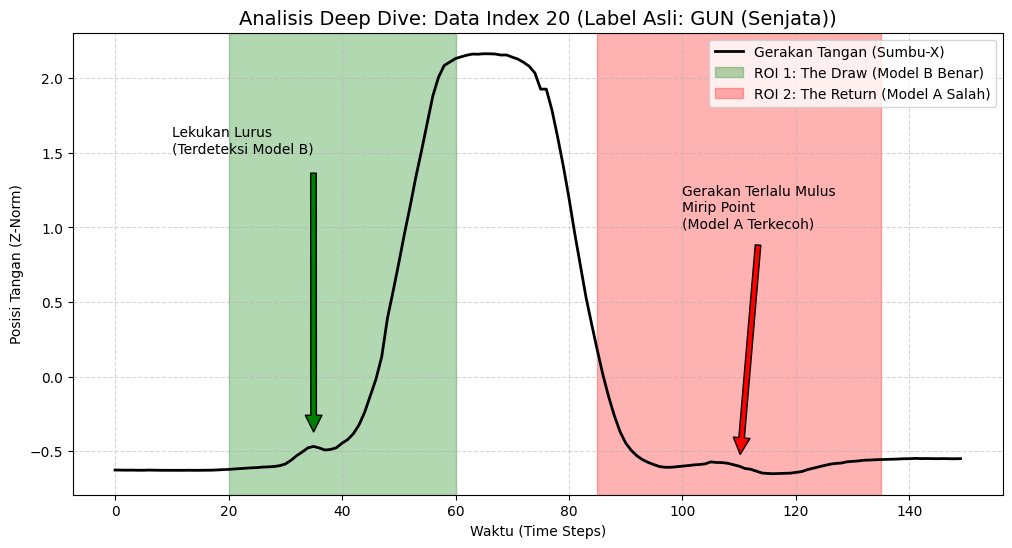

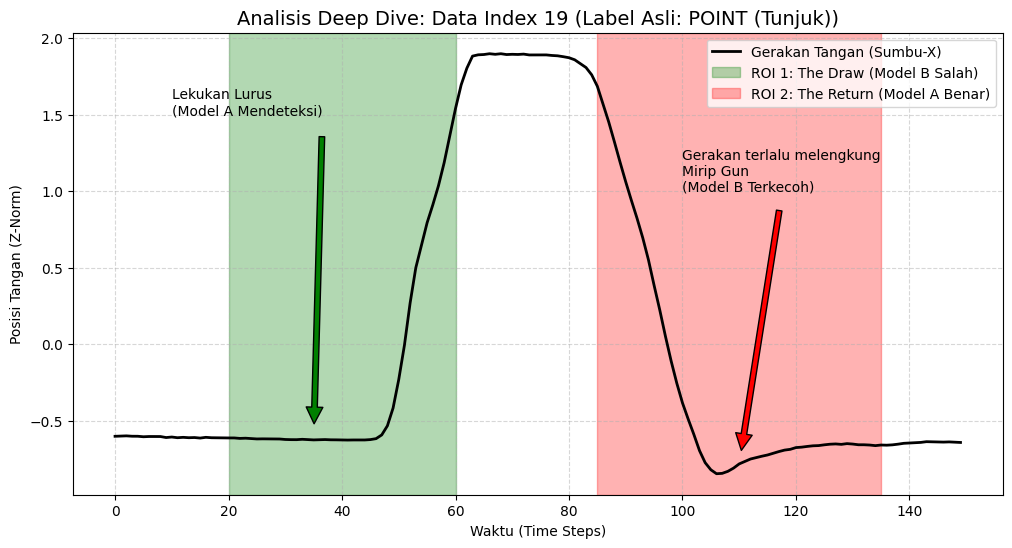

In [21]:
import matplotlib.pyplot as plt


idx = 20
data_sample = X_test[idx].flatten()
label_asli = y_test[idx]
label_text = "GUN (Senjata)" if label_asli == '1' else "POINT (Tunjuk)"

plt.figure(figsize=(12, 6))


plt.plot(data_sample, color='black', linewidth=2, label='Gerakan Tangan (Sumbu-X)')


plt.axvspan(20, 60, color='green', alpha=0.3, label='ROI 1: The Draw (Model B Benar)')


plt.axvspan(85, 135, color='red', alpha=0.3, label='ROI 2: The Return (Model A Salah)')


plt.title(f"Analisis Deep Dive: Data Index {idx} (Label Asli: {label_text})", fontsize=14)
plt.xlabel("Waktu (Time Steps)")
plt.ylabel("Posisi Tangan (Z-Norm)")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)


plt.annotate('Lekukan Lurus\n(Terdeteksi Model B)', xy=(35, data_sample[35]), xytext=(10, 1.5),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate('Gerakan Terlalu Mulus\nMirip Point\n(Model A Terkecoh)', xy=(110, data_sample[110]), xytext=(100, 1),
             arrowprops=dict(facecolor='red', shrink=0.05))

idx = 19
data_sample = X_test[idx].flatten()
label_asli = y_test[idx]
label_text = "GUN (Senjata)" if label_asli == '1' else "POINT (Tunjuk)"

plt.figure(figsize=(12, 6))


plt.plot(data_sample, color='black', linewidth=2, label='Gerakan Tangan (Sumbu-X)')


plt.axvspan(20, 60, color='green', alpha=0.3, label='ROI 1: The Draw (Model B Salah)')


plt.axvspan(85, 135, color='red', alpha=0.3, label='ROI 2: The Return (Model A Benar)')


plt.title(f"Analisis Deep Dive: Data Index {idx} (Label Asli: {label_text})", fontsize=14)
plt.xlabel("Waktu (Time Steps)")
plt.ylabel("Posisi Tangan (Z-Norm)")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)


plt.annotate('Lekukan Lurus\n(Model A Mendeteksi)', xy=(35, data_sample[35]), xytext=(10, 1.5),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.annotate('Gerakan terlalu melengkung\nMirip Gun\n(Model B Terkecoh)', xy=(110, data_sample[110]), xytext=(100, 1),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

### **4.4 Ensemble Model**

Setelah melatih dua model dengan perspektif berbeda, Menggabungkan keduanya menggunakan teknik Class-Specific Priority (Prioritas Spesifik per Kelas):
- Model A (Full): Diberi peran utama untuk memvalidasi kelas Point (karena paham konteks gerakan mulus secara utuh).
- Model B (ROI): Diberi prioritas mutlak untuk menentukan kelas Gun (karena sangat sensitif terhadap keberadaan objek senjata).

Dengan membedakan "Juri" untuk setiap kelas, sistem menjadi lebih tegas. Jika Model B melihat ciri fisik senjata (lekukan), maka keputusan Gun akan langsung menang (Override) tanpa memperdulikan keraguan Model A. Sebaliknya, jika Model B tidak melihat senjata, barulah Model A berhak memutuskan bahwa itu gerakan aman (Point).
$$Decision = \begin{cases} \textbf{GUN} & \text{jika } Model B = \text{Gun} \\ \textbf{POINT} & \text{jika } Model B \neq \text{Gun} \text{ dan } Model A = \text{Point} \end{cases}$$

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

label_gun = '1'    
label_point = '2'  


pred_A = model_A.predict(X_test)
pred_B = model_B.predict(X_test_B)

y_pred_final = pred_A.copy()

mask_B_is_gun = (pred_B == label_gun)
y_pred_final[mask_B_is_gun] = label_gun

print(f" Akurasi Final: {accuracy_score(y_test, y_pred_final):.2%}")


 Akurasi Final: 97.50%


## **5. Evaluation**

In [42]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



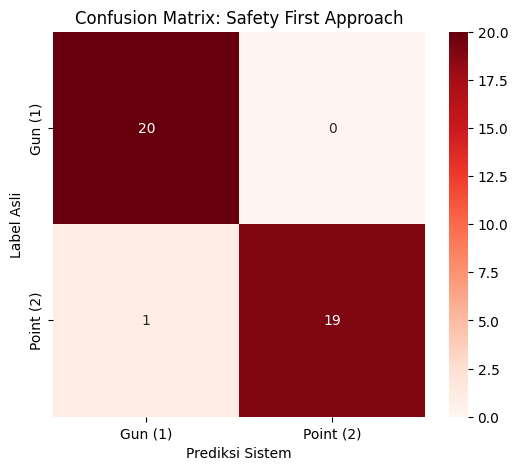

In [45]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Gun (1)', 'Point (2)'], yticklabels=['Gun (1)', 'Point (2)'])
plt.title('Confusion Matrix: Safety First Approach')
plt.xlabel('Prediksi Sistem')
plt.ylabel('Label Asli')
plt.show()

## **6. Deployment**

### Simpan Model

In [48]:
import joblib

nama_file_model_A = 'model_A_full.pkl'
nama_file_model_B = 'model_B_roi.pkl'

joblib.dump(model_A, nama_file_model_A)
joblib.dump(model_B, nama_file_model_B)



['model_B_roi.pkl']

### Integrasi Model dengan WEB

Mneggunakan Module Streamlit untuk Deployment
- source code: https://github.com/abdulsahl/PSD_UAS
- Link Web: https://230411100090abdullohsahluaspsd.streamlit.app/

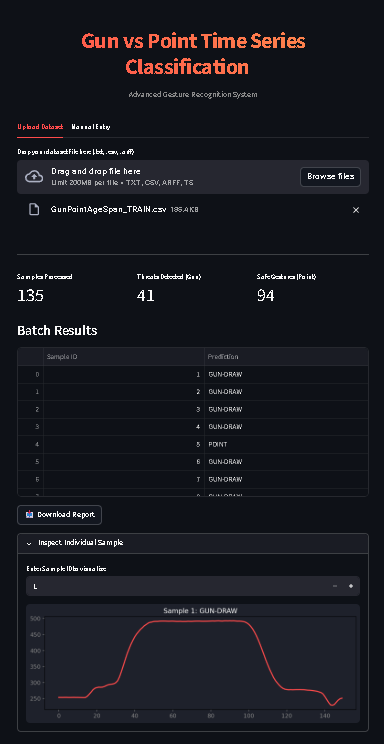